# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [ ]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015285491943359375 (+/- 0.0008801170020484984)
avg score time: 0.002568817138671875 (+/- 0.0011610410488110672)
avg test score: 0.96 (+/- 0.024944382578492935)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01909174919128418 (+/- 0.003445320684755057)
avg score time: 0.0075492382049560545 (+/- 0.0008307527447225181)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0012933731079101563 (+/- 0.00016605441717490883)
avg score time: 0.002310037612915039 (+/- 0.00022680923713346547)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019660377502441408 (+/- 0.0029867651769461116)
avg score time: 0.007726335525512695 (+/- 0.0005438487520092228)
avg test score: 0.9607936507936508 (+/- 0.022468028291073656)


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0024545669555664064 (+/- 0.001016914458747385)
avg score time: 0.007585954666137695 (+/- 0.0018034049747101212)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020364761352539062 (+/- 0.0033774426507487813)
avg score time: 0.014191722869873047 (+/- 5.5190394189212825e-05)
avg test score: 0.9630957925787922 (+/- 0.010219838955441115)


#### SVC

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018414497375488282 (+/- 0.0005657006938690616)
avg score time: 0.0007730960845947265 (+/- 0.00033953258741887616)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02472071647644043 (+/- 0.002547051813833718)
avg score time: 0.002950286865234375 (+/- 0.00032211818633352704)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002681446075439453 (+/- 0.0012635743781260799)
avg score time: 0.0006414413452148438 (+/- 0.0001128447602302095)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.027407217025756835 (+/- 0.004401200609109565)
avg score time: 0.003360128402709961 (+/- 0.00030551469133800556)
avg test score: 0.9607936507936508 (+/- 0.013352216409405144)


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006442451477050781 (+/- 0.0013473781339832312)
avg score time: 0.0014053821563720704 (+/- 0.00017606204610372107)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.036692047119140626 (+/- 0.0015904136072232193)
avg score time: 0.006799650192260742 (+/- 0.00016298105730962995)
avg test score: 0.9736531594472908 (+/- 0.011071310015572391)


#### Decision Tree

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002477121353149414 (+/- 0.0015243220537946185)
avg score time: 0.0005644798278808594 (+/- 0.00010915016073902339)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023235034942626954 (+/- 0.0031629599651028773)
avg score time: 0.002284336090087891 (+/- 0.00019154516001173316)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002166080474853516 (+/- 0.0006761223095048357)
avg score time: 0.00044803619384765626 (+/- 9.311292848278612e-05)
avg test score: 0.8653968253968254 (+/- 0.05901176586884972)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023144245147705078 (+/- 0.002667385298920597)
avg score time: 0.002169227600097656 (+/- 1.3177108218003622e-05)
avg test score: 0.9663492063492063 (+/- 0.0109581305359322)


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008556699752807618 (+/- 0.0006930154896320885)
avg score time: 0.0006054878234863281 (+/- 0.00010476011441577635)
avg test score: 0.9156031672100605 (+/- 0.014530063697296881)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03450179100036621 (+/- 0.003699071079226956)
avg score time: 0.002484750747680664 (+/- 0.0001734367198746323)
avg test score: 0.9507995652848937 (+/- 0.02044009065701531)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [ ]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00318603515625 (+/- 0.0028831802147083665)
avg score time: 0.002141237258911133 (+/- 0.00035397161036367905)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018857336044311522 (+/- 0.004593972378093121)
avg score time: 0.009099626541137695 (+/- 0.0002947184473126631)
avg test score: 0.4620738944137801 (+/- 0.14912060054268167)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001579141616821289 (+/- 0.0005607174675189843)
avg score time: 0.0020910263061523437 (+/- 0.0005131369284293416)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01819748878479004 (+/- 0.003074590555879159)
avg score time: 0.008895111083984376 (+/- 0.00035322921946582685)
avg test score: 0.41621570663454255 (+/- 0.06018199661221915)


#### SVR

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016269874572753907 (+/- 0.002405606248754888)
avg score time: 0.002446556091308594 (+/- 5.0359873718535005e-05)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05120849609375 (+/- 0.004538760975733777)
avg score time: 0.008662271499633788 (+/- 0.0005809664920719997)
avg test score: 0.15356162310340496 (+/- 0.30311527422602236)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01054849624633789 (+/- 0.0013327659528316524)
avg score time: 0.001832723617553711 (+/- 4.653891578885408e-05)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.039818954467773435 (+/- 0.002679567551226163)
avg score time: 0.007002353668212891 (+/- 0.00030693697116660097)
avg test score: 0.06213306867441337 (+/- 0.028331522990266925)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005090761184692383 (+/- 0.001713096561223089)
avg score time: 0.0007906436920166015 (+/- 0.00019027191245282445)
avg test score: 0.06041490453834912 (+/- 0.9561254670960595)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03120250701904297 (+/- 0.00549400581096208)
avg score time: 0.002676725387573242 (+/- 0.0002667428512081862)
avg test score: 0.5283070748166132 (+/- 0.31006728799833544)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # 0.5: 50%

In [ ]:
cross_val = cross_validate(
  estimator=base_model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004999542236328125 (+/- 0.0023137403433554364)
avg score time: 0.0008778095245361329 (+/- 0.00014986555698175415)
avg test score: -0.13718097067329132 (+/- 0.08941076266124431)


In [ ]:
cross_val = cross_validate(
  estimator=bagging_model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028506374359130858 (+/- 0.004109083642504909)
avg score time: 0.002482891082763672 (+/- 9.01785931571346e-05)
avg test score: 0.3856074142290481 (+/- 0.07351665275608289)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12581844329833985 (+/- 0.010171454049613565)
avg score time: 0.007760047912597656 (+/- 0.00032120658483393073)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13477725982666017 (+/- 0.00571748055566062)
avg score time: 0.00784144401550293 (+/- 0.00013792671204375024)
avg test score: 0.9719047619047618 (+/- 0.017572511115045146)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18983263969421388 (+/- 0.003529430050237367)
avg score time: 0.008267354965209962 (+/- 9.563639383602314e-05)
avg test score: 0.9613569321533924 (+/- 0.024538280965143388)


### Random Forests 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.30445523262023927 (+/- 0.008598981953146723)
avg score time: 0.008362817764282226 (+/- 0.0016131866010301987)
avg test score: 0.6147917154759851 (+/- 0.227222134379451)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2569565773010254 (+/- 0.016935140475895314)
avg score time: 0.007376194000244141 (+/- 3.207416709040008e-05)
avg test score: 0.4187582580836442 (+/- 0.05606905823187833)


### Extremely Randomized Trees 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08865561485290527 (+/- 0.005158940479140778)
avg score time: 0.007750606536865235 (+/- 7.56663496999745e-05)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0943068027496338 (+/- 0.006285713103682097)
avg score time: 0.007982540130615234 (+/- 0.00021162151269294734)
avg test score: 0.9833333333333332 (+/- 0.022222222222222233)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10670585632324218 (+/- 0.0027635540722941)
avg score time: 0.008894729614257812 (+/- 0.00022566428211951084)
avg test score: 0.9630957925787922 (+/- 0.017003450094260936)


### Extremely Randomized Trees 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1756455898284912 (+/- 0.006030583032848969)
avg score time: 0.00776820182800293 (+/- 0.00021258700062804208)
avg test score: 0.6122374396574852 (+/- 0.27808779804153017)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15240907669067383 (+/- 0.0047981331142326585)
avg score time: 0.008406639099121094 (+/- 0.0008989217451064284)
avg test score: 0.43666050787402677 (+/- 0.03849787331659891)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_classes = 3
n_estimators = 30
cmap=plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [ ]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

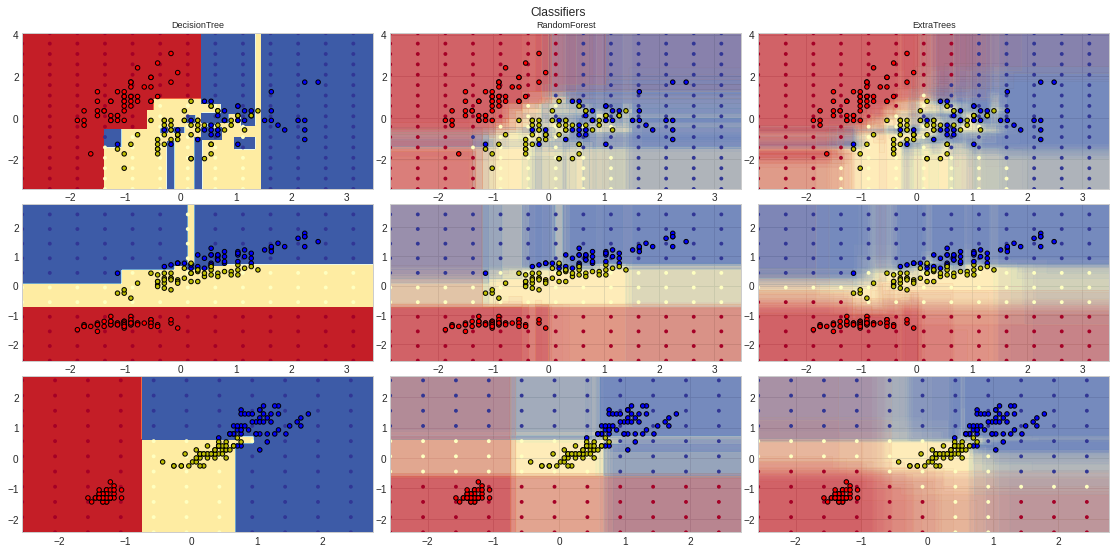

In [ ]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):

  for model in models:

    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0]) # X의 행 개수만큼 생성
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx) # 랜덤으로 섞기
    X = X[idx]
    y = y[idx]
    
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)
    
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier): # model이 DecisionTreeClassifier인 경우
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r', 'y', 'b']),
                edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [ ]:
plot_idx = 1
models = [DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

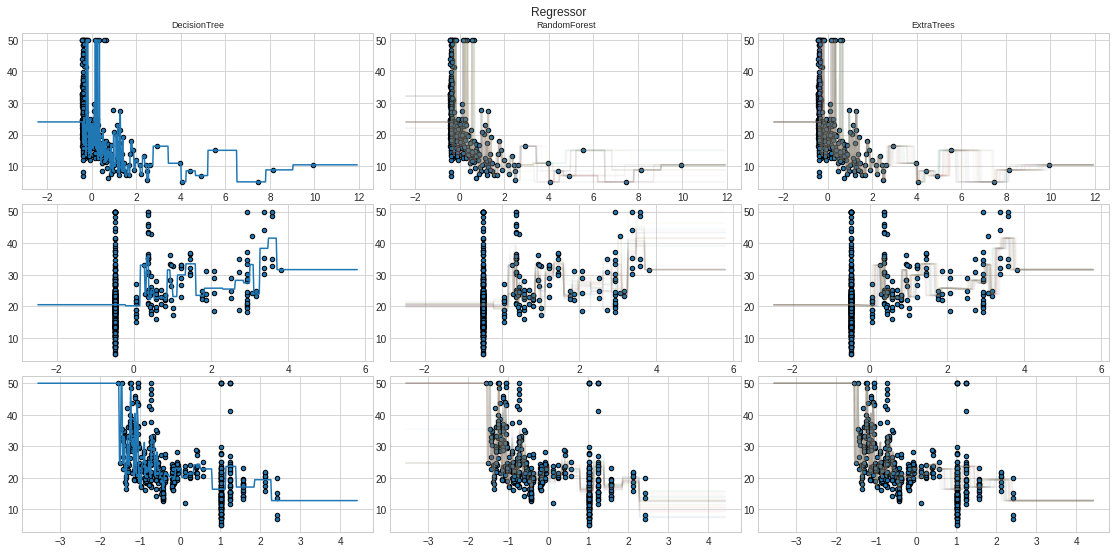

In [ ]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1


plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06423563957214355 (+/- 0.0036494995379031097)
avg score time: 0.0064160823822021484 (+/- 0.00013788222804869628)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07253785133361816 (+/- 0.0042209906443535315)
avg score time: 0.006359481811523437 (+/- 0.0001724663773860166)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14351744651794435 (+/- 0.004129330217484583)
avg score time: 0.007427740097045899 (+/- 0.0002658089122858515)
avg test score: 0.9718677224033534 (+/- 0.0195587047134823)


### AdaBoost 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08881721496582032 (+/- 0.0032408774139314916)
avg score time: 0.004052591323852539 (+/- 0.0005612758900340198)
avg test score: 0.5775416544032456 (+/- 0.22578251290485477)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0712460994720459 (+/- 0.019802365077387224)
avg score time: 0.003338193893432617 (+/- 0.0007313302126294635)
avg test score: 0.4131663046666523 (+/- 0.04673044215720032)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [ ]:
model = make_pipeline(
  StandardScaler(),
  GradientBoostingClassifier()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17332420349121094 (+/- 0.010944553824383491)
avg score time: 0.0009508609771728515 (+/- 5.437436651679639e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=wine.data, y=wine.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21863861083984376 (+/- 0.0023801990335662548)
avg score time: 0.0009137630462646484 (+/- 1.3604992253996969e-05)
avg test score: 0.9330158730158731 (+/- 0.03296317528191366)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=cancer.data, y=cancer.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.42157974243164065 (+/- 0.004254879870333619)
avg score time: 0.0009386062622070313 (+/- 2.7276335867649405e-05)
avg test score: 0.9596180717279925 (+/- 0.021164983541135364)


### Gradient Tree Boosting 회귀

In [ ]:
model = make_pipeline(
  StandardScaler(),
  GradientBoostingRegressor()
)

In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11709833145141602 (+/- 0.0027262632279732245)
avg score time: 0.0009723186492919921 (+/- 5.673568734224389e-05)
avg test score: 0.6776736303681203 (+/- 0.1567955660123328)


In [ ]:
cross_val = cross_validate(
  estimator=model,
  X=diabetes.data, y=diabetes.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09057283401489258 (+/- 0.0027440421170443264)
avg score time: 0.0009789466857910156 (+/- 1.4261337689150029e-05)
avg test score: 0.40869238419512666 (+/- 0.07073786601789876)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
  estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
  voting='hard'
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [ ]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
  estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
  voting='soft',
  weights=[2, 1, 2] # estimator 가중치
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [ ]:
X = iris.data[:, [0, 2]]
y = iris.target

In [ ]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting='soft', weights=[2, 1, 2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [ ]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

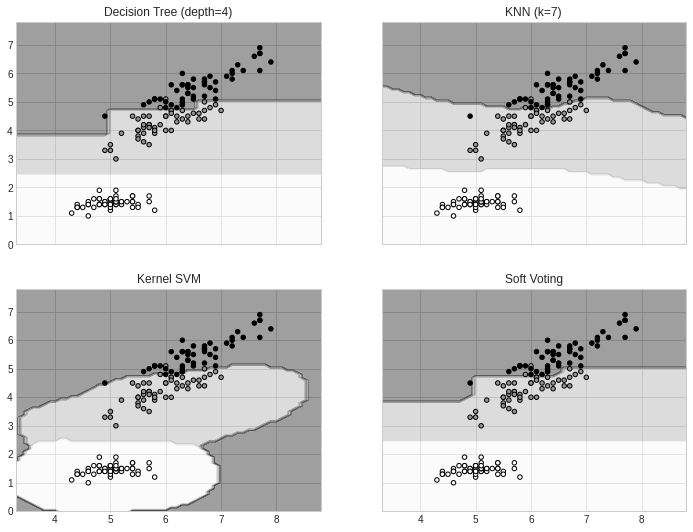

In [ ]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 9)) # x축으로 column, y축으로 row

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.17) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.20) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [ ]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [ ]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

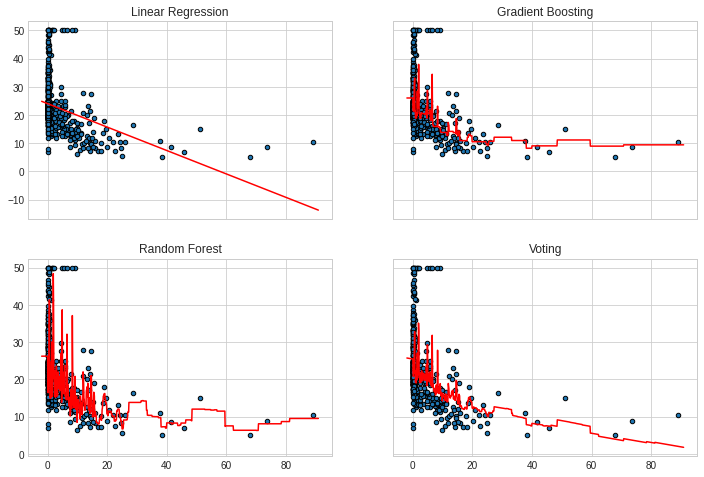

In [ ]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [ ]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [ ]:
cross_val = cross_validate(
  estimator=reg,
  X=boston.data, y=boston.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14353818893432618 (+/- 0.005138880983730096)
avg score time: 0.0029440402984619142 (+/- 0.0001244997439224269)
avg test score: 0.3182174361529949 (+/- 0.3331992831737385)


#### 회귀식 시각화

In [ ]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [ ]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

In [ ]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

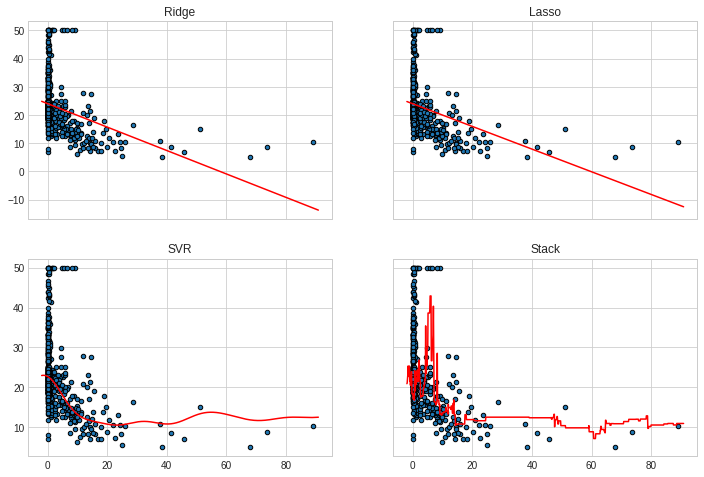

In [ ]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC()),
               ('naive', GaussianNB())]

In [ ]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [ ]:
cross_val = cross_validate(
  estimator=clf,
  X=iris.data, y=iris.target,
  cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2830188751220703 (+/- 0.00728630789123296)
avg score time: 0.009579801559448242 (+/- 0.0015930940817612716)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


#### 결정 경계 시각화

In [ ]:
X = iris.data[:, [0, 2]]
y = iris.target

In [ ]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [ ]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

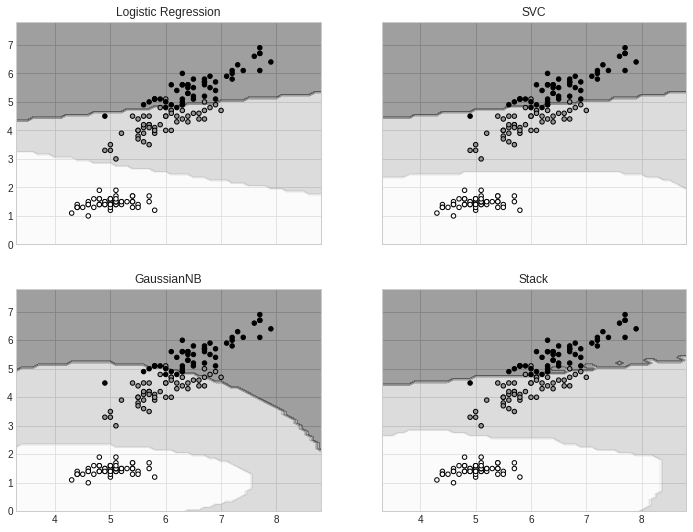

In [ ]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 9)) # x축으로 column, y축으로 row

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC',
                           'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()